In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import site
site.addsitedir(site.USER_SITE)

from src import regrid_roms as rr


A lightweight package to regrid ROMS data

Functions:
  - read_data_sources -> catalog: reads data_sources.yaml that contains info to load ROMS data
  - ROMSLoader(catalog.entry) -> loader(year) -> ds_roms
  - ROMSRegridder(ds, res_out, bbox_out=[W,S,E,N]) -> regridder(ds_roms) -> ds_regridded
  - plot_map(ds_roms.pco2sea) -> fig, axs, img 




In [3]:
# setting up the data sources is critical! 
# have a look at how I've done this 
catalog = rr.read_data_sources('./data_sources.yaml')

In [4]:
# here we give the ROMSLoader a dictionary that contains all the required info loaded from the yaml file
pactcs30_loader = rr.ROMSLoader(catalog.ROMS_pactcs30_hc006)

In [5]:
ds_1979 = pactcs30_loader(0)  # load the first file in the time series
# OR
ds_2000 = pactcs30_loader(2000)  # load the year

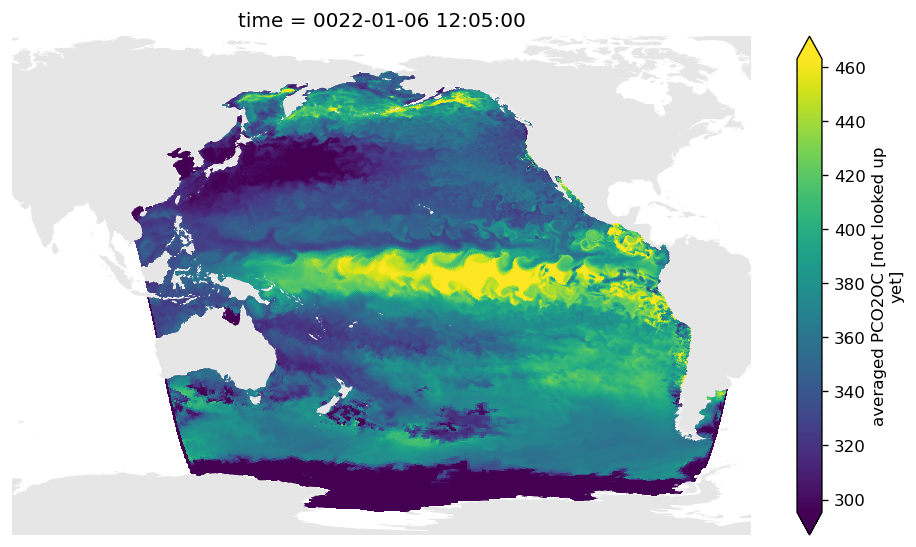

In [6]:
# we can have a look at the data in the native reoslution
fig, axs, img = rr.plot_map(ds_2000.pco2sea[0])

In [7]:
# create a regridder using xESMF - this will store the weights for faster computation later
pactcs30_regridder = rr.ROMSRegridder(
    ds_in=ds_1979,  # the input file (only done once per model and can be reused for different years from that model)
    res_out=0.25,  # resolution in degrees of the output
    bbox_out=[-170, 0, -70, 67],  # this is the output area W, S, E, N
)

2025-03-13 16:48:33.837 | INFO     | src.regrid_roms.regrid:make_regridder:48 - Loading existing weights: data/weights/bilinear_518x604_268x400.nc


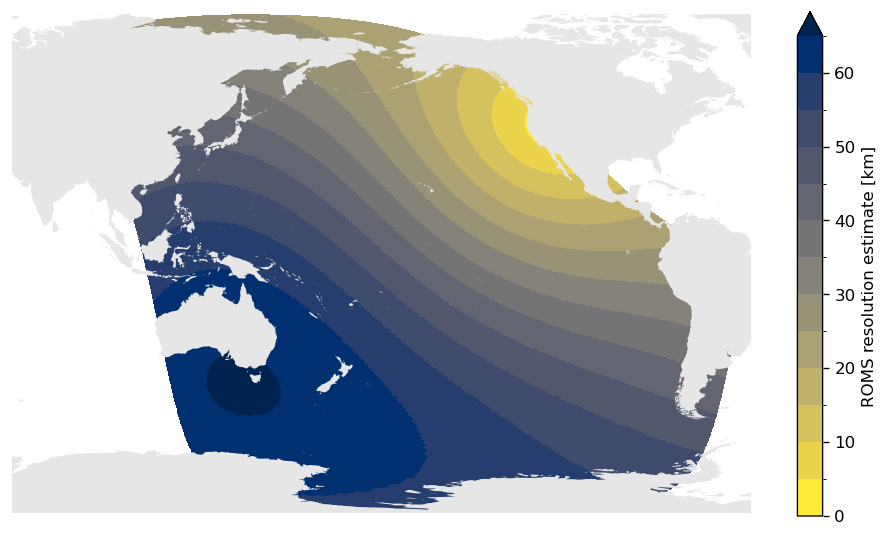

In [8]:
# we can have a quick look at the resolution of the output - I have not checked that this works
ax = pactcs30_regridder.estimate_resolution(return_plot=True, regridded=False)

In [9]:
# to regrid a dataset or dataArray, simply pass the file to the regridder
out = pactcs30_regridder(
    ds_roms=ds_2000.pco2sea[0], 
    compute=True,  # if False, then returns dask obj, else computs with progressbar
)

  0%|          | 0/4 [00:00<?, ?it/s]

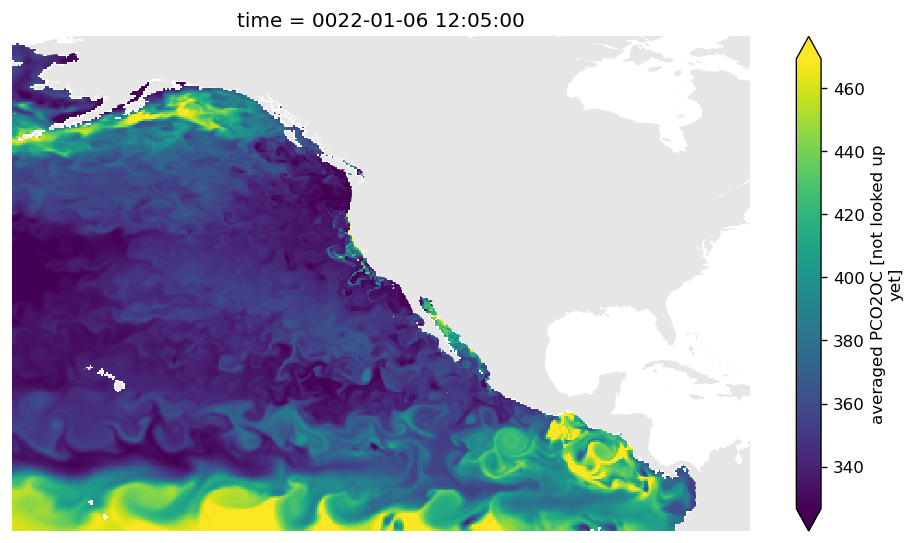

In [10]:
# I've also created a quick function to plot a map
fig, axs, img = rr.plot_map(out)